In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('rainfall.csv')
X = data[['MinTemp','MaxTemp','WindSpeed','Humidity9am','RainToday']]
Y = data[['RainTomorrow']]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

test_df = pd.concat ([X_test,y_test],axis =1 )

gausian = GaussianNB()
gausian.fit(X_train, y_train)
gausian_pred = gausian.predict(X_test)
test_df['gausian_pred'] = gausian_pred
test_df.to_csv('classification_results.csv')
score = accuracy_score(y_test, gausian_pred)
score #68.6%

svc_m = SVC(gamma ='auto', probability = True)
svc_m.fit(X_train, y_train)
svc_pred = svc_m.predict(X_test)
test_df['svc_pred'] = svc_pred
test_df.to_csv('classification_results.csv')
score = accuracy_score(y_test, svc_pred)
score # 62.3%

dt_m = DecisionTreeClassifier(random_state = 42)
dt_m.fit(X_train, y_train)
dt_pred = dt_m.predict(X_test)
test_df['dt_pred'] = dt_pred
test_df.to_csv('classification_results.csv')
score = accuracy_score(y_test, dt_pred)
score # 68.6%

# group / ensemble of models
estimator = []
estimator.append(('gauNB',GaussianNB()))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred_hard = vot_hard.predict(X_test)

test_df['y_pred_hard'] = y_pred_hard
score_hard = accuracy_score(y_test, y_pred_hard)
print(score_hard)
test_df.to_csv('classification_results.csv')

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred_soft = vot_soft.predict(X_test)
  
# using accuracy_score
score_soft = accuracy_score(y_test, y_pred_soft)
print(score_soft)
test_df['y_pred_soft'] = y_pred_soft
test_df.to_csv('classification_results.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

0.690677966101695
0.690677966101695


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


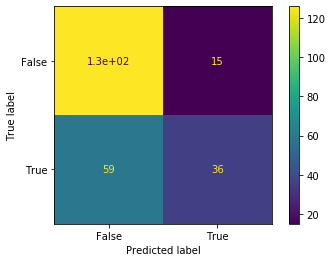

array([[126,  15],
       [ 59,  36]], dtype=int64)

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_hard)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
confusion_matrix

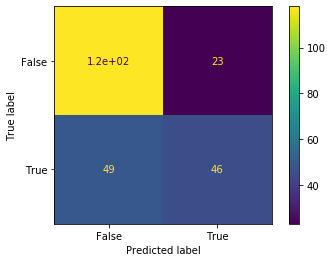

array([[118,  23],
       [ 49,  46]], dtype=int64)

In [48]:
confusion_matrix_vot = metrics.confusion_matrix(y_test, y_pred_soft)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_vot, display_labels = [False, True])

cm_display.plot()
plt.show()
confusion_matrix_vot